# Prepare a simple profit function on [T,soilw] space 

Used chatGPT: 
"Please write python code to construct an xarray dataset for me, with coordinates 'T' ranging from 270 to 310, and 'soilw' ranging from 0 to 1, and then a data field called 'cost' whose values in that 2D space have a central maximum near T=290, soilw=0.5 and decrease to negative values far from there" amd then tweaked it 

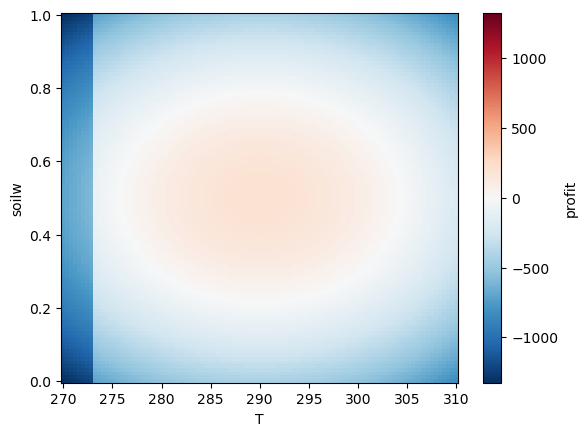

In [43]:
import numpy as np
import xarray as xr

# Define the coordinates
T_values = np.linspace(270, 310, 100)
soilw_values = np.linspace(0, 1, 100)

# Create a 2D grid of T and soilw values
T, soilw = np.meshgrid(T_values, soilw_values)

# Create a synthetic cost field: Gaussian decay from central goodness
profit = 200 -(T-290)**2 - (50*(soilw-0.5))**2 - 500*(T < 273)

# Create xarray dataset
ds = xr.Dataset(
    {
        'profit': (['soilw', 'T'], profit),
    },
    coords={'soilw': soilw_values, 'T': T_values}
)

# Display the dataset
ds.profit.plot()

In [44]:
!ls ../BiznessSpecificParameters/

Geographical_Sampling_Points.csv  Weather_PayoutTables_deciles.csv
Preparations_CostsBenefits.csv    profitfunction.nc
SpatialDownscaling_parameters.csv


In [46]:
ds.to_netcdf('../BiznessSpecificParameters/profitfunction.nc') 